### **PROJECT: Prediction of Order-Rejection of an E-commerce Sales**

***By: Yaipharen P M Potsangbam***

<a id="toc"></a>
#### **TABLE OF CONTENTS:**
1. [BACKGROUND AND MOTIVATIONS](#background)<br>
2. [OBJECTIVES](#objectives)<br>
3. [DATA EXTRACTION](#data_extraction)<br>
    a. [Import Relevant Libraries](#import_libraries)<br>
    b. [Check the file names in zipped folder](#check_file_names)<br>
    c. [Read the dataset to a pandas dataframe](#read_dataset_to_dataframe)<br>
4. [DATA TRANSFORMATION (WRANGLING)](#data_transformation_wrangle)<br>
    a. [Define a function as first draft of wrangle function](#first_draft_wrangle)<br>
    b. [Exploratory Data Analysis(EDA)](#eda)<br>
    &emsp;i. [Preliminary Data Cleaning](#preliminary_data_cleaning)<br>
    &emsp;ii. [Analyse "orderid" Column](#orderid)<br>
    &emsp;&emsp;[(Observations and Actions)](#orderid_oa)<br>
    &emsp;iii. [Create Column "rejected"](#create_rejected)<br> 
    &emsp;&emsp;[(Observations and Actions)](#observation_rej)<br>
    &emsp;iv. [Check for high Cardinality categorical features](#high_cardinality)<br>
    &emsp;&emsp;[(Observations and Actions)](#observation_cardi)<br>
    &emsp;v. [Check other features (not "object" datatype)](#other_features)<br>
    &emsp;vi. [Analyse feature "qty": Quantity per order](#qty)<br>
    &emsp;&emsp;[(Observations and Actions)](#observation_qty)<br>
    &emsp;vi. [Analyse feature "amount": Amount in Rupees](#amount)<br>
    &emsp;&emsp;[(A. Initial Observations and Actions)](#observation_amount)&emsp;
    [(B. Final Observations and Actions)](#observation_amount_2)<br>
    &emsp;viii. [Analyse feature "fulfilment"](#fulfilment)<br>
    &emsp;&emsp;[(Observations and Actions)](#observation_fulfilment)<br>
    &emsp;ix. [Analyse feature "saleschannel"](#saleschannel)<br>
    &emsp;&emsp;[(Observations and Actions)](#observation_saleschannel)<br>
    &emsp;x. [Analyse feature "shipservicelevel"](#shipservicelevel)<br>
    &emsp;&emsp;[(Observations and Actions)](#observation_shipservicelevel)<br>
    &emsp;xi. [Analyse feature "category"](#category)<br>
    &emsp;&emsp;[(Observations and Actions)](#observation_category)<br>
    &emsp;xii. [Analyse feature "b2b"](#b2b)<br>
    &emsp;&emsp;[(Observations and Actions)](#observation_b2b)<br>
    &emsp;xiii. [Analyse feature "shipstate"](#shipstate)<br>
    &emsp;&emsp;[(A. Initial Observations and Actions)](#observation_shipstate)&emsp;
    [(B. Initial Observations and Actions)](#observation_shipstate_2)<br>
    c. [Define Final Wrangle Function](#final_wrangle)<br>
5. [DATA LOADING](#data_loading)<br>
6. [DATA PREPROCESSING](#data_preprocessing)<br>
    a. [Split the Dataset](#split_dataset)<br>
    b. [Address the imbalanced dataset](#imbalance_check)<br>
    c. [Data Transformation](#data_transformation)<br>
7. [CLASSIFICATION MODELS FOR PREDICTION](#models)<br>
    a. [Logistic Regression Classifier](#logisticregression)<br>
    &emsp;&emsp;i. [Instance of Logistic Regression Estimator](#logistic_model)<br>
    &emsp;&emsp;ii. [Prediction and Performance - TRAINING DATASET](#prediction_training_logistic)<br>
    &emsp;&emsp;iii. [Prediction and Performance - TEST DATASET](#prediction_test_logistic)<br>
    &emsp;&emsp;iv. [ROC Curve of Prediction with Logistic Regression - TEST DATASET](#roc_logistic)<br>
    &emsp;&emsp;v. [Feature Importance](#feat_imp_logistic)<br>
    b. [Random Forest Classifier](#random_forest)<br>
    &emsp;&emsp;i. [Instance; Hyperparameter Tuning; Model Fitting](#rf_estimator)<br>
    &emsp;&emsp;ii. [Prediction and Performance - TRAINING DATASET](#prediction_training_rf)<br>
    &emsp;&emsp;iii. [Prediction and Performance - TEST DATASET](#prediction_test_rf)<br>
    &emsp;&emsp;iv. [ROC Curve of Prediction with Logistic Regression - TEST DATASET](#roc_rf)<br>
    &emsp;&emsp;v. [Feature Importance](#feat_imp_rf)<br>
8. [FINDINGS AND DISCUSSION](#findings_discussion)<br>
    a. [Findings](#findings)<br>
    b. [Discussion](#discussion)

<a id='background'></a>
#### **1. BACKGROUND AND MOTIVATION:**
* **Business Motivation:** Customer behaviour with regard to order rejection
* **Business Question:** How likely a purchase made will be rejected and what triggers these rejections?

<br>*Click [here](#toc) to go back to **Table of Contents**.*

<a id="objectives"></a>
#### **2. OBJECTIVES**
**(Answers to Business Question):** 
1. Predict the likelihood of order rejection, and 
2. The top feature(s) impacting the decisions (rejection)
<br>*Click [here](#toc) to go back to **Table of Contents**.*

<a id="data_extraction"></a>
#### **3. DATA EXTRACTION**
<a id="import_libraries"></a>
##### **3.a. Import relevant libraries**

*Click [here](#toc) to go back to **Table of Contents**.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from glob import glob
sns.set()
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score
from sklearn import set_config
set_config(display = "diagram")  
import warnings
warnings.simplefilter(action="ignore", category="SettingWithCopyWarning")

<a id="check_file_names"></a>
##### **3.b. Check the file names in the dataset filepath**

*Click [here](#toc) to go back to **Table of Contents**.*

In [2]:
# assign the list of filepaths to a list variable
filepath_list = glob("/kaggle/input/unlock-profits-with-e-commerce-sales-data/*.csv")
filepath_list

# code to list out the names of the fcsv files
print(f"The names of all the {len(filepath_list)} csv files in the folder are: ")
for number, filepath_name in enumerate(filepath_list, start = 1):
    print(f" {number}. {filepath_name.rsplit(sep = '/',maxsplit = 1)[1]}")

The names of all the 7 csv files in the folder are: 
 1. Amazon Sale Report.csv
 2. Cloud Warehouse Compersion Chart.csv
 3. May-2022.csv
 4. P  L March 2021.csv
 5. International sale Report.csv
 6. Expense IIGF.csv
 7. Sale Report.csv


<a id="read_dataset_to_dataframe"></a>
##### **3.c. Read the dataset to a temporary pandas dataframe**
* The dataset in the "*Amazon Sale Report.csv*" file is what we need and thus, we extract and read this dataset into pandas dataframe

*Click [here](#toc) to go back to **Table of Contents**.*

In [3]:
# read the dataset to a temporary pandas dataframe
dataframe = pd.read_csv(filepath_list[0],low_memory = False)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

<a id="data_transformation_wrangle"></a>
#### **4. DATA TRANSFORMATION**
<a id="first_draft_wrangle"></a>
##### **4.a. Define a function as first draft of wrangle function**
* This is for **preliminary cleansing** of the dataframe and **(not the final wrangle function)**
* **Note:** The conditions for wrangling the data in this function is based on the preliminary analysis of data requirements, which are **easily and logically** identifiable for cleansing, for the **purpose of this project**.

*Click [here](#toc) to go back to **Table of Contents**.*

In [4]:
def first_draft_wrangle(dataframe):
    
    # copy dataframe to df for wrangling
    df = dataframe.copy()
    
    #clean the column names
    col = [element.lower().replace(" ","").replace("-","") for element in df.columns]
    df.columns = col
    
    # drop the redundant features for the purpose of this analysis
    df.drop(["index","date","fulfilledby","currency","unnamed:22","promotionids","courierstatus",
             "shipcountry"],axis ="columns", inplace = True)
    
    # fill value "unknown" in rows where location (city and state) is not known 
    df["shipstate"].fillna("unknown", inplace = True)
    df["shipcity"].fillna("unknown", inplace = True)
    
    # fill value 0 in rows where postalcode is null
    df["shippostalcode"].fillna(0, inplace = True)
    
    #change dtype of postalcode to int
    df["shippostalcode"] = df["shippostalcode"].astype(int).astype(object)
    
    # clean the col shipstate to atain a 37 unique values i.e.
    # (28 states + 8 UT + 1 as "UNKNOWN")
    df["shipstate"] = df["shipstate"].str.upper()
    df["shipstate"].replace({"PONDICHERRY":"PUDUCHERRY","RAJSHTHAN":"RAJASTHAN","RAJSTHAN":"RAJASTHAN",
                              "RJ":"RAJASTHAN","PB":"PUNJAB","PUNJAB/MOHALI/ZIRAKPUR":"PUNJAB",
                              "ORISSA":"ODISHA","DELHI":"NEW DELHI","NL":"UNKNOWN","APO":"UNKNOWN",
                              "AR":"UNKNOWN"}, inplace = True)
    
    # drop duplicates rows if any
    df.drop_duplicates(inplace = True)
    
    
    # return cleaned data
    return df

<a id="eda"></a>
##### **4.b. Exploratory Data Analysis (EDA)**

<a id="preliminary_data_cleaning"></a>
**4.b.i. Preliminary Data Cleaning**<br>
Using the **first_draft_wrangle()** function we read and store the preliminary cleaned dataset in pandas dataframe **"df"**.

*Click [here](#toc) to go back to **Table of Contents**.*

In [5]:
df = first_draft_wrangle(dataframe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128969 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   orderid           128969 non-null  object 
 1   status            128969 non-null  object 
 2   fulfilment        128969 non-null  object 
 3   saleschannel      128969 non-null  object 
 4   shipservicelevel  128969 non-null  object 
 5   style             128969 non-null  object 
 6   sku               128969 non-null  object 
 7   category          128969 non-null  object 
 8   size              128969 non-null  object 
 9   asin              128969 non-null  object 
 10  qty               128969 non-null  int64  
 11  amount            121177 non-null  float64
 12  shipcity          128969 non-null  object 
 13  shipstate         128969 non-null  object 
 14  shippostalcode    128969 non-null  object 
 15  b2b               128969 non-null  bool   
dtypes: bool(1), float64(

<a id="orderid"></a>
<br>**4.b.ii. Analyse "orderid" Column.**<br>
Now, we check for **orderid(s)** that appear in more than one row (orderids with **multiple products** purchased per order)

*Click [here](#toc) to go back to **Table of Contents**.*

In [6]:
# dataframe of repeated orderid(s) - all rows
orderid_repeat_rows = df[df["orderid"].duplicated(keep = False)]

# count the unique repeated orderid(s)
unique_orderid_repeat_count = orderid_repeat_rows["orderid"].nunique()

# count the total number of rows in the dataset occupied by repeated orders
orderid_repeat_rows_count = len(orderid_repeat_rows)

# count the number of rows in the dataset occuppied by nonrepeat_orderids
orderid_nonrepeat_rows = df[df["orderid"].duplicated(keep = False) == False]
orderid_nonrepeat_rows_count = len(orderid_nonrepeat_rows)
 
print(f"1. Number of unique orderid with multiple products per orderid purchased: {unique_orderid_repeat_count}\n"
         f"2. Total number of rows of these orderid(s) with multiple products: {orderid_repeat_rows_count}\n"
          f"3. Number of unique orderid with single product per orderid purchased: {orderid_nonrepeat_rows_count}"
         )

1. Number of unique orderid with multiple products per orderid purchased: 6840
2. Total number of rows of these orderid(s) with multiple products: 15431
3. Number of unique orderid with single product per orderid purchased: 113538


<br>Plot a **bar chart** showing the proportions of these two types of orders

*Click [here](#toc) to go back to **Table of Contents**.*

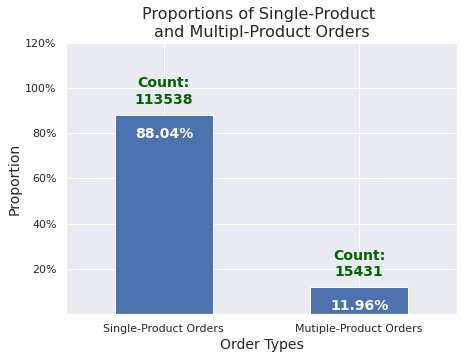

In [7]:
# bar chart using matplotlib package
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in a pandas.Series
orderid_repeat_rows = df[df["orderid"].duplicated(keep = False)]
unique_orderid_repeat_list = orderid_repeat_rows["orderid"].unique()
plot_dataseries = round(df["orderid"].isin(unique_orderid_repeat_list).
                        value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax)
plt.title("Proportions of Single-Product \nand Multipl-Product Orders", fontsize = 16)
plt.ylabel("Proportion", fontsize = 14)
plt.xlabel("Order Types", fontsize = 14)
plt.xticks(ticks = plot_dataseries.index,
           labels = ["Single-Product Orders", "Mutiple-Product Orders"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100,120], labels = ["20%","40%","60%","80%","100%","120%"])

# create another two series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")
count_label = pd.Series(df["orderid"].isin(unique_orderid_repeat_list).value_counts()).astype("str")

# add/plot the data-label in the chart
# in percentage format
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-10,data_label[x],color = "white",
             fontweight = 700,fontsize = 14, horizontalalignment = "center")
    
# in count values format
for x,y in enumerate(plot_dataseries):
    plt.text(x,y+5,("Count:\n"+count_label[x]),color = "Darkgreen",
             fontweight = 700,fontsize = 14, horizontalalignment = "center")
plt.show()

<a id="orderid_oa"></a>
<br>**Observations:**
1. We see that **88.03%** (almost **90%**)of the data are from orders with **single-product order**.
2. We are now interested in the majority and, therefore, **drop** the **multiple-product orders**.
3. And, we **focus** our analysis on the **single-product orders** for prediction/classification<br>

**Actions:** 
1. We drop the orderid(s) **multiple-product** orders.
2. We further **drop "orderid"** column which is plainly not required (redundant) now.

*Click [here](#toc) to go back to **Table of Contents**.*

In [8]:
# drop the orderids with multiple products
df = df[df["orderid"].duplicated(keep = False) == False]

# drop redundant column "orderid"
df.drop("orderid", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113538 entries, 0 to 128974
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   status            113538 non-null  object 
 1   fulfilment        113538 non-null  object 
 2   saleschannel      113538 non-null  object 
 3   shipservicelevel  113538 non-null  object 
 4   style             113538 non-null  object 
 5   sku               113538 non-null  object 
 6   category          113538 non-null  object 
 7   size              113538 non-null  object 
 8   asin              113538 non-null  object 
 9   qty               113538 non-null  int64  
 10  amount            106449 non-null  float64
 11  shipcity          113538 non-null  object 
 12  shipstate         113538 non-null  object 
 13  shippostalcode    113538 non-null  object 
 14  b2b               113538 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 13.1+ MB


<a id="create_rejected"></a>
<br>**4.b.iii. Create column "rejected"** 
<br>Create a column named **"rejected"** as the **target feature** with two unique values (classifications): 1 and 0 representing rejected and not-rejected respectively
* **Drop** the rows with **"status" having values unsure** of whether the orders can be assumend to be "rejected" or not
* **Add** a column **"rejected"** where the values are logically assumed/derived from values in column **"status"**..
* Then, we **drop** column "status".

*Click [here](#toc) to go back to **Table of Contents**.*

In [9]:
# get the unique values in col "status"
df["status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

* The **"status" value** that can be logically assumed to be or likened to **"rejection"** are:
<br>**'Cancelled'**, **'Shipped - Returned to Seller'**, **'Shipped - Rejected by Buyer'**, **'Shipped - Returning to Seller'**.
* The **"status" value** that can be logically assumed to be or likened to **"non-rejection"** are:
<br>**'Shipped - Delivered to Buyer'**.
* The rest are dropped

In [10]:
# drop the rows with unsure rejection status
known_value = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller','Shipped - Delivered to Buyer']
df = df[df["status"].isin(known_value)]   

# create a col "rejected" where value 1 means rejected and 0 means not-rejected" 
rejected = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller']
df["rejected"] = df["status"].isin(rejected).astype(int)    # change the dtype to "int" 

# drop col "status" 
df.drop("status",axis = "columns", inplace = True)

<br>Plot a **bar chart** showing the proportions of these two types of "status"

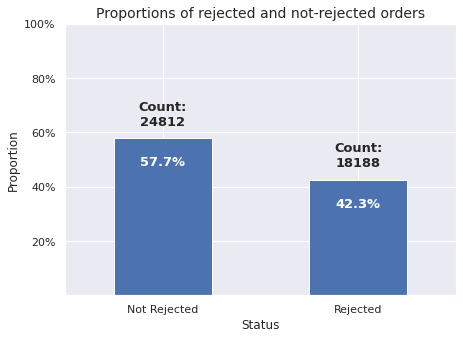

In [11]:
# bar chart using matplotlib package
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in a pandas.Series
plot_dataseries = round(df["rejected"].value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax)
plt.title("Proportions of rejected and not-rejected orders", fontsize = 14)
plt.ylabel("Proportion", fontsize = 12)
plt.xlabel("Status", fontsize = 12)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["Not Rejected", "Rejected"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])

# create another series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")

# create one more series to to display count
data_count = df["rejected"].value_counts()

# add/plot the data-label in the chart
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-10,data_label[x],color = "white",
             fontweight = 700,fontsize = 13, horizontalalignment = "center")

# add count label
for x,y in enumerate(plot_dataseries):
    plt.text(x,y+5,"Count:\n" + str(data_count[x]),fontweight = 700,
             fontsize = 13,horizontalalignment = "center")
    
plt.show()

<a id="observation_rej"></a>
<br>**Observation:**&emsp;Dataset seems to be having **unbalanced** class distribution aprox. **58%** as not-rejected and **42%** as rejected.
<br>**Action:**&emsp;We shall keep it as it is. But, we will **resample later** during training.

*Click [here](#toc) to go back to **Table of Contents**.*

<a id="high_cardinality"></a>
<br>**4.b.iv. Check for high Cardinality categorical features**

*Click [here](#toc) to go back to **Table of Contents**.*

In [12]:
df.select_dtypes(include = "object").nunique()

fulfilment             2
saleschannel           2
shipservicelevel       2
style               1148
sku                 5291
category               8
size                  11
asin                5290
shipcity            5293
shipstate             37
shippostalcode      6852
dtype: int64

<a id="observation_cardi"></a>
<br>**Observation:**&emsp;Features **"style"**,**"sku"**,**"shipcity"**,**"shippostalcode"** and **"asin"** have high cardinality
<br>**Action:**&emsp;We **drop** these features

*Click [here](#toc) to go back to **Table of Contents**.*

In [13]:
# drop high cardinality fetures
df.drop(["style","sku","shipcity","shippostalcode","asin"],axis = 1, inplace = True)

<a id="other_features"></a>
<br>**4.b.v. Check other features (not "object" datatype)**

*Click [here](#toc) to go back to **Table of Contents**.*

In [14]:
# display features excluding dtype "object"
df.select_dtypes(exclude = "object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 0 to 128969
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   qty       43000 non-null  int64  
 1   amount    36034 non-null  float64
 2   b2b       43000 non-null  bool   
 3   rejected  43000 non-null  int64  
dtypes: bool(1), float64(1), int64(2)
memory usage: 1.4 MB


<a id="qty"></a>
<br>**4.b.vi. Analysing feature "qty": Quantity per Order**

*Click [here](#toc) to go back to **Table of Contents**.*

In [15]:
# create a pandas dataframe calculating the 
# porportion (and number of occurence) of the "qty" values

# calculate the respective "proportions" of values in "qty" 
qty_prop = round(df["qty"].value_counts(normalize = True)*100,2)

#  rename series with "Proportion(%)", sort by index and change to dateframe
qty_prop = qty_prop.rename("Proportion(%)").sort_index().to_frame()

# rename index.name with "qty_value" and 
qty_prop.index.name = "qty_value"

# add col "count"
qty_prop["Count"] = df["qty"].value_counts()

# change dtype of "Proportion(%)" column and concat string "%"
qty_prop["Proportion(%)"] = (
    qty_prop["Proportion(%)"].astype(str)
    .str.cat(np.full(fill_value = "%",shape = (len(qty_prop),)))
)

qty_prop

,Proportion(%),Count
qty_value,,
0,26.46%,11379
1,73.3%,31518
2,0.21%,90
3,0.02%,8
4,0.01%,3
5,0.0%,2


<br>**Plot the above data**

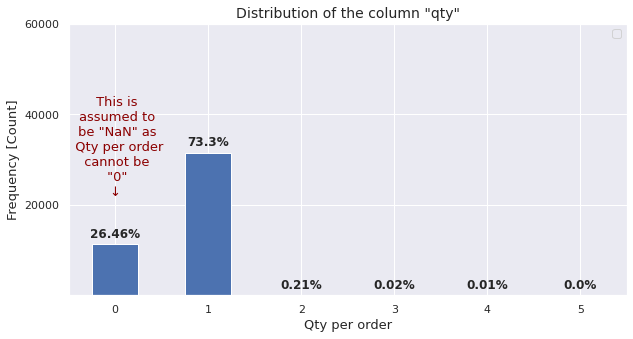

In [16]:
# Plot distribution of Quantity per order
# Plot a figure to represent data of the above table(dataframe)
fig, ax = plt.subplots(figsize = (10,5))
qty_prop.plot(kind = "bar",y = "Count",ax = ax)
plt.xlabel("Qty per order", fontsize = 13)
plt.ylabel("Frequency [Count]",fontsize = 13)
plt.yticks(ticks = range(20000,60001,20000))
plt.title('Distribution of the column "qty"', fontsize = 14,fontweight = 550)
plt.xticks(rotation = "horizontal")
plt.legend("")
for x,y in enumerate(qty_prop["Count"]):
    qty_value = qty_prop.index[x]
    plt.text(x,y+1500,qty_prop["Proportion(%)"].loc[qty_value],
            horizontalalignment = "center",fontweight = 700)
        
plt.text(0,22000,' This is\n assumed to\n be "NaN" as\n  Qty per order\n  cannot be \n "0"\n↓',
         horizontalalignment = "center",color = "darkred", fontsize = 13)
plt.show()


<a id="observation_qty"></a>
<br>**Observations:**
* Feature **"qty"** is highly **skewed** (when assuming it as ***continuous variable***), or
* It's highly **imbalanced** (when assuming it as ***categorical variable***)
* It's **logical** to assume the value **"0"** as **"NaN"** (Null) because an order purchased cannot have quantity "0"
* More than **99%** of datapoints have **value "1"** or **"NaN"** so it may not add  much information in the analysis.

<br>**Actions:**
* Therefore, we **drop** feature **"qty"**.

*Click [here](#toc) to go back to **Table of Contents**.*

In [17]:
# drop feature "qty"
df.drop("qty", axis = "columns", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 0 to 128969
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfilment        43000 non-null  object 
 1   saleschannel      43000 non-null  object 
 2   shipservicelevel  43000 non-null  object 
 3   category          43000 non-null  object 
 4   size              43000 non-null  object 
 5   amount            36034 non-null  float64
 6   shipstate         43000 non-null  object 
 7   b2b               43000 non-null  bool   
 8   rejected          43000 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.0+ MB


<a id="amount"></a>
<br>**4.b.vii. Analysing feature **"amount"**: Amount in Rupees.**

*Click [here](#toc) to go back to **Table of Contents**.*

In [18]:
# number of datapoints (rows) having value of amount = 0
amount0 = len(df[df["amount"] == 0])
f"The number of datapoints/orderids/rows) having amount value as 0 is:   {amount0}"

'The number of datapoints/orderids/rows) having amount value as 0 is:   769'

* It's also logical to assume the value **"0"** as **"NaN"** (Null) because an order purchased cannot have amount "0"

In [19]:
# replace 0s with "NaN"
df["amount"] = df["amount"].replace(0,np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 0 to 128969
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfilment        43000 non-null  object 
 1   saleschannel      43000 non-null  object 
 2   shipservicelevel  43000 non-null  object 
 3   category          43000 non-null  object 
 4   size              43000 non-null  object 
 5   amount            35265 non-null  float64
 6   shipstate         43000 non-null  object 
 7   b2b               43000 non-null  bool   
 8   rejected          43000 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.0+ MB


<br>**Check the Distribution of "amount" feature**
* Plot **boxplot** and **histogram**

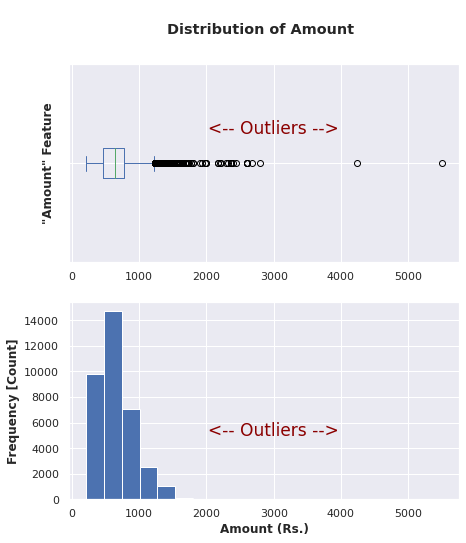

In [20]:
# settin figure and subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (7,8))

# set title for the entire figure
plt.suptitle("\n Distribution of Amount", fontweight = 600)

# code for plotting boxplot
df["amount"].plot(kind = "box",vert = False,ax = ax1)
ax1.text(3000, 1.15, "<-- Outliers -->", fontsize = 17,
         horizontalalignment = "center", color = "darkred")
ax1.set_ylabel('"Amount" Feature',fontsize = 12, fontweight = 600)
#ax1.set_xlabel("Amount (Rs.)\n", fontsize = 12,, fontweight = 600)
ax1.set_yticklabels(labels = "")
#ax1.legend(labels = ['Amount [Boxplot]'], fontsize = 15)

# code for plotting histogram
df["amount"].plot(kind = "hist",bins = 20, ax = ax2)
ax2.text(3000, 5000, "<-- Outliers -->", fontsize = 17,
         horizontalalignment = "center", color = "darkred")
ax2.set_ylabel('Frequency [Count]',fontsize = 12, fontweight = 600)
ax2.set_xlabel("Amount (Rs.)", fontsize = 12, fontweight = 600)
#ax2.legend(labels = ['Amount [Histogram]'],fontsize = 15)

plt.show()

<a id="observation_amount"></a>
<br>**A. Initial Observations and Actions:**
<br>**Observations:**&emsp; There is presence of **outliers** on the higher amount values.
<br>**Actions:**&emsp; We explore feature "amount" again after removing **5 percentile of highest** values.

*Click [here](#toc) to go back to **Table of Contents**.*

In [21]:
# create an "amount" series with no outliers (removing highest 5 percentile)
no_outlier = df["amount"][df["amount"] < df["amount"].quantile(0.95)]

<br>**Check the new distribution of "amount" feature** 
* Plot **boxplot** and **histogram**

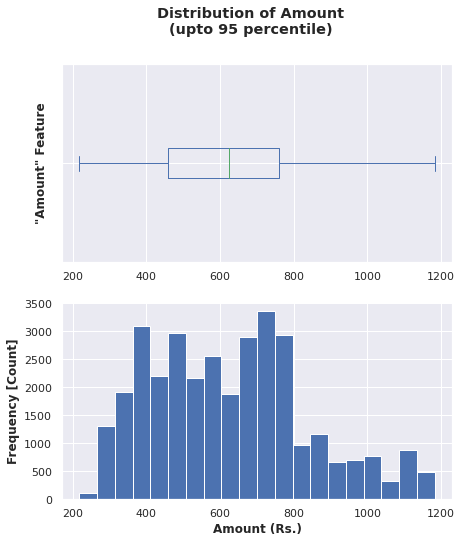

In [22]:
# settin figure and subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (7,8))

# set title for the entire figure
plt.suptitle("Distribution of Amount\n(upto 95 percentile)", fontweight = 600)

# code for plotting boxplot
no_outlier.plot(kind = "box",vert = False,ax = ax1)
ax1.set_ylabel('"Amount" Feature',fontsize = 12, fontweight = 600)
#ax1.set_xlabel("Amount (Rs.)\n", fontsize = 12,, fontweight = 600)
ax1.set_yticklabels(labels = "")
#ax1.legend(labels = ['Amount [Boxplot]'], fontsize = 15)

# code for plotting histogram
no_outlier.plot(kind = "hist",bins = 20, ax = ax2)
ax2.set_ylabel('Frequency [Count]',fontsize = 12, fontweight = 600)
ax2.set_xlabel("Amount (Rs.)", fontsize = 12, fontweight = 600)
#ax2.legend(labels = ['Amount [Histogram]'],fontsize = 15)

plt.show()

<a id="observation_amount_2"></a>
<br>**B. Final Observations and Actions:**
<br>**Observations:**&emsp; The Distribution now looks good as it's very less skewed or it can be assumed to be closer to normal distribution than earlier.
<br>**Actions:**&emsp; So, **drop** these **outliers** of  the feature "amount".

*Click [here](#toc) to go back to **Table of Contents**.*

In [23]:
# remove outliers by removing highest 5 percentile of the "amount" feature
# Note: still include the rows with value "NaN" 
df = df[(df["amount"] < df["amount"].quantile(0.95)) | df["amount"].isnull()].reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41141 entries, 0 to 41140
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfilment        41141 non-null  object 
 1   saleschannel      41141 non-null  object 
 2   shipservicelevel  41141 non-null  object 
 3   category          41141 non-null  object 
 4   size              41141 non-null  object 
 5   amount            33406 non-null  float64
 6   shipstate         41141 non-null  object 
 7   b2b               41141 non-null  bool   
 8   rejected          41141 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 2.6+ MB


<a id="fulfilment"></a>
<br>**4.b.viii. Analyse the feature "fulfilment"**

*Click [here](#toc) to go back to **Table of Contents**.*

In [24]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
df_cat = df["fulfilment"].value_counts().to_frame()
df_cat["proportion"] = round(df["fulfilment"].value_counts(normalize = True)*100,2)
df_cat["proportion"] = df_cat["proportion"].astype(str).str.cat(np.full((2,),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"fulfilment":"count","index":"fulfilment_type"}))
df_cat


,fulfilment_type,count,proportion
0,Merchant,31083,75.55%
1,Amazon,10058,24.45%


<a id="observation_fulfilment"></a>
<br>**Observations:**&emsp; Although the distribution is imbalanced it still looks good for the purpose of this analysis as the **frequency (counts)** values are **not small**.
<br>**Actions:**&emsp; **No action**

*Click [here](#toc) to go back to **Table of Contents**.*

<a id="saleschannel"></a>
<br>**4.b.ix. Analyse the feature "saleschannel"**

*Click [here](#toc) to go back to **Table of Contents**.*

In [25]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
df_cat = df["saleschannel"].value_counts().to_frame()
df_cat["proportion"] = round(df["saleschannel"].value_counts(normalize = True)*100,4)
df_cat["proportion"] = df_cat["proportion"].astype(str).str.cat(np.full((2,),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"saleschannel":"count","index":"saleschannel_type"}))
df_cat

,saleschannel_type,count,proportion
0,Amazon.in,41140,99.9976%
1,Non-Amazon,1,0.0024%


<a id="observation_saleschannel"></a>
<br>**Observations:**&emsp; The distribution is **extremely imbalanced** and the **frequency (counts)** value of "Non-Amazon" is **just "1"** and thus will not add value (information) to our analysis.
<br>**Actions:**&emsp; **Drop** the feature **"saleschannel"**

*Click [here](#toc) to go back to **Table of Contents**.*

In [26]:
# drop the feature "saleschannel"
df.drop("saleschannel", axis = "columns", inplace = True)

<a id="shipservicelevel"></a>
<br>**4.b.x. Analyse the feature "shipservicelevel"**

*Click [here](#toc) to go back to **Table of Contents**.*

In [27]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
df_cat = df["shipservicelevel"].value_counts().to_frame()
df_cat["proportion"] = round(df["shipservicelevel"].value_counts(normalize = True)*100,2)
df_cat["proportion"] = df_cat["proportion"].astype(str).str.cat(np.full((2,),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"shipservicelevel":"count","index":"shipservicelevel_type"}))
df_cat

,shipservicelevel_type,count,proportion
0,Standard,31129,75.66%
1,Expedited,10012,24.34%


<a id="observation_shipservicelevel"></a>
<br>**Observations:**&emsp; Although the distribution is imbalanced it still looks good for the purpose of this analysis as the **frequency (counts)** values are **not small**.
<br>**Actions:**&emsp; **No action**

*Click [here](#toc) to go back to **Table of Contents**.*

<a id="category"></a>
<br>**4.b.xi. Analyse the feature "category"**

*Click [here](#toc) to go back to **Table of Contents**.*

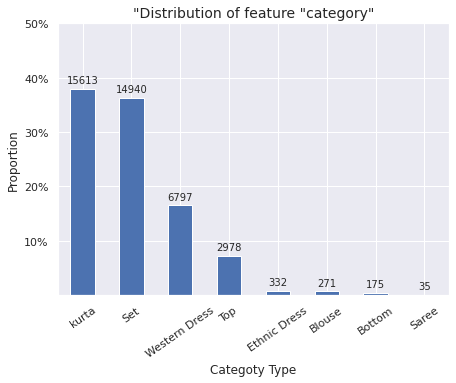

In [28]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
fig,ax = plt.subplots(figsize = (7,5))
df_cat = df["category"].value_counts().to_frame()
df_cat["proportion"] = round(df["category"].value_counts(normalize = True)*100,2)
df_cat["proportion_label"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"category":"count","index":"category_type"}))

df_cat.plot(
    kind = "bar", x = "category_type",y = "proportion",
    legend = "", ax = ax
)
plt.xlabel("Categoty Type")
plt.ylabel("Proportion")
plt.title('"Distribution of feature "category"', fontsize = 14)
plt.xticks(rotation = 35)
plt.yticks(ticks = range(10,51,10) ,labels =["10%","20%","30%","40%","50%"])

for x,y in enumerate(df_cat["count"]):
    plt.text(x,1+df_cat["proportion"][x],y,
             fontsize = 10, horizontalalignment = "center")
plt.show()

<a id="observation_category"></a>
<br>**Observations:**&emsp; Although the distribution is imbalanced it still looks good for the purpose of this analysis as the **frequency (counts)** values are **not small**.
<br>**Actions:**&emsp; **No action**

*Click [here](#toc) to go back to **Table of Contents**.*

<a id="b2b"></a>
<br>**4.b.xii. Analyse the feature "b2b"**

*Click [here](#toc) to go back to **Table of Contents**.*

In [29]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
df_cat = df["b2b"].value_counts().to_frame()
df_cat["proportion"] = round(df["b2b"].value_counts(normalize = True)*100,2)
df_cat["proportion"] = df_cat["proportion"].astype(str).str.cat(np.full((2,),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"b2b":"count","index":"b2b_type"}))
df_cat

,b2b_type,count,proportion
0,False,40911,99.44%
1,True,230,0.56%


<a id="observation_b2b"></a>
<br>**Observations:**&emsp; Although the distribution is imbalanced it still **looks ok** for the purpose of this analysis as the **frequency (counts)** values are **not small**.
<br>**Actions:**&emsp; Change the data type to **categorical/object**

*Click [here](#toc) to go back to **Table of Contents**.*

In [30]:
# change the data type of feature "b2b" to object
df["b2b"] = df["b2b"].astype(object)

<a id="shipstate"></a>
<br>**4.b.xiii. Analyse the feature "shipstate"**

*Click [here](#toc) to go back to **Table of Contents**.*

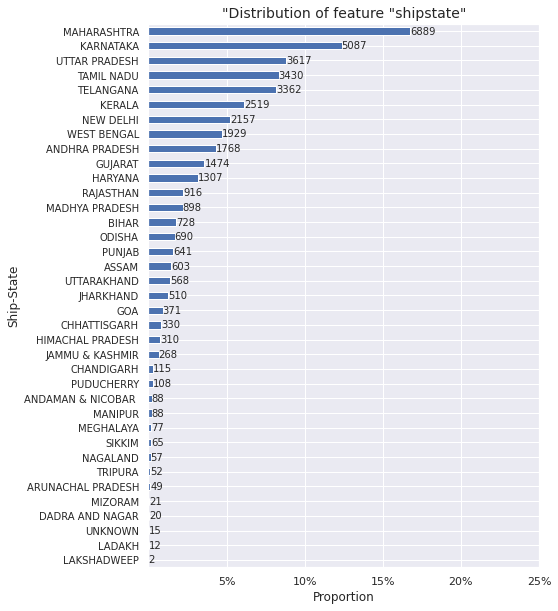

In [31]:
# create a dataframe to check the proportion of unique value types (shipstate_type)
df_cat = df["shipstate"].value_counts().to_frame()
df_cat["proportion"] = round(df["shipstate"].value_counts(normalize = True)*100,2)
df_cat["proportion_str"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"shipstate":"count","index":"shipstate_type"}))

df_cat = df_cat.sort_values(by = "proportion").reset_index(drop = True)
fig,ax = plt.subplots(figsize = (7,10))

df_cat.plot(
    kind = "barh", x = "shipstate_type",y = "proportion",
    legend = "", ax = ax
)
plt.ylabel("Ship-State")
plt.xlabel("Proportion")
plt.title('"Distribution of feature "shipstate"', fontsize = 14)
plt.yticks(ticks = list(range(0,len(df_cat))) ,labels=df_cat["shipstate_type"],
          fontsize = 10)
plt.xticks(ticks = range(5,26,5) ,labels =["5%","10%","15%","20%","25%"])

for x,y in enumerate(df_cat["count"]):
    plt.text((df_cat["proportion"][x]),x,y,
             fontsize = 10, verticalalignment = "center")
plt.show()

<a id="observation_shipstate"></a>
<br>**A. Initial Observatins and Actions**
<br>**Observations:**
* The distribution is imbalanced.
* The **frequency (counts)** values of the **North-Eastern States** and  **Union Territories** and **"UNKNOWN"** states are **very small**.

<br>**Actions:**
* Therefore we create a feature **"region"** re-categorise these states to regions of Inida base on geographical Directions: **"norteastindia"**,**"northindia"**,**"southindia"**,**"eastindia"**,**"westindia"** and **"centralindia"**.
* We also drop the "UNKNOWN" that has only 15 counts.

*Click [here](#toc) to go back to **Table of Contents**.*

In [32]:
# Add a col named "regions" based on the geographical location of states
df["region"] = df["shipstate"].replace({
    "MAHARASHTRA":"westindia","KARNATAKA":"southindia",
    'PUDUCHERRY':"southindia",'TELANGANA':"southindia",
    'ANDHRA PRADESH':"southindia", 'HARYANA':"northindia",
    'JHARKHAND':"eastindia", 'CHHATTISGARH':"eastindia",
    'ASSAM':"northeastindia",'ODISHA':"eastindia",
    'UTTAR PRADESH':"northindia", 'GUJARAT':"westindia",
    'TAMIL NADU':"southindia", 'UTTARAKHAND':"northindia",
    'WEST BENGAL':"eastindia", 'RAJASTHAN':"westindia",
    'NEW DELHI':"centralindia",'MADHYA PRADESH':"centralindia",
    'KERALA':"southindia", 'JAMMU & KASHMIR':"northindia",
    'BIHAR':"eastindia",'MEGHALAYA':"northeastindia",
    'PUNJAB':"northindia", 'GOA':"southindia",
    'TRIPURA':"northeastindia", 'CHANDIGARH':"northindia",
    'HIMACHAL PRADESH':"northindia",'SIKKIM':"northeastindia",
    "ANDAMAN & NICOBAR ":"eastindia", 'MANIPUR':"northeastindia",
    'MIZORAM':"northeastindia",'NAGALAND':"northeastindia",
    'ARUNACHAL PRADESH':"northeastindia", 'LADAKH':"northindia",
    'DADRA AND NAGAR':"westindia",'LAKSHADWEEP':"southindia"
})

# rows with "UNKNOWN" shipstates
df = df[df["shipstate"] != "UNKNOWN"]

* Plot **barcharts** of the feature **"region"**

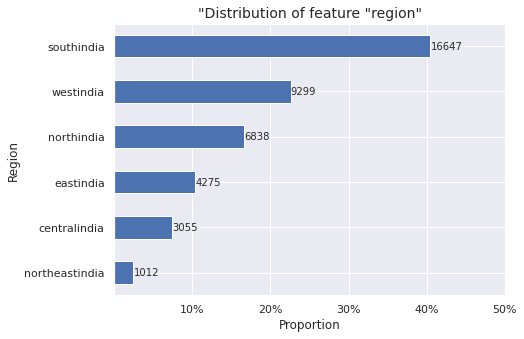

In [33]:
# create a dataframe to check the proportion of unique value types (shipstate_type)
df_cat = df["region"].value_counts().to_frame()
df_cat["proportion"] = round(df["region"].value_counts(normalize = True)*100,2)
df_cat["proportion_str"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"region":"count","index":"region_name"}))

df_cat = df_cat.sort_values(by = "proportion").reset_index(drop = True)
fig,ax = plt.subplots(figsize = (7,5))

df_cat.plot(
    kind = "barh", x = "region_name",y = "proportion",
    legend = "", ax = ax
)
plt.ylabel("Region")
plt.xlabel("Proportion")
plt.title('"Distribution of feature "region"', fontsize = 14)
plt.yticks(ticks = list(range(0,len(df_cat))) ,labels=df_cat["region_name"])
plt.xticks(ticks = range(10,51,10) ,labels =["10%","20%","30%","40%","50%"])

for x,y in enumerate(df_cat["count"]):
    plt.text((df_cat["proportion"][x]),x,y,
             fontsize = 10, verticalalignment = "center")
plt.show()

<a id="observation_shipstate_2"></a>
<br>**B. Final Observations and Actions**
<br>**Observations:**
* The distribution is still imbalanced.
* But, regions of lower values **frequency (counts)** are **not so small**.

<br>**Actions:**
* Drop feature **"shipstate"** as it will be relaced by new feature **"region"**

*Click [here](#toc) to go back to **Table of Contents**.*

In [34]:
# drop the feature "shipstate"
df.drop("shipstate",axis = "columns", inplace = True)

#reset index
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41126 entries, 0 to 41125
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfilment        41126 non-null  object 
 1   shipservicelevel  41126 non-null  object 
 2   category          41126 non-null  object 
 3   size              41126 non-null  object 
 4   amount            33394 non-null  float64
 5   b2b               41126 non-null  object 
 6   rejected          41126 non-null  int64  
 7   region            41126 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.5+ MB


<a id="final_wrangle"></a>
##### **4.c. Define Final Wrangle Function**
Write the final wrangle function ***final_wrangle()*** with argument **"filepath"** to access and read  original csv file **"Amazon Sale Report.csv"** from the zipped folder **Archive.zip** and then, to return clean dataframe **df** which is to be used for classification analysis.

*Click [here](#toc) to go back to **Table of Contents**.*

In [35]:
def final_wrangle(filepath):
    
    df = pd.read_csv(filepath, low_memory = False)
    
    #clean the column names
    col = [element.lower().replace(" ","").replace("-","") for element in df.columns]
    df.columns = col
    
    # drop the redundant cols " in the dataset
    df.drop(["index","date","fulfilledby","currency","unnamed:22","promotionids","courierstatus",
             "shipcountry"],axis ="columns", inplace = True)
    
    # fill value "unknown" in rows where location (city and state) is not known 
    df["shipstate"].fillna("unknown", inplace = True)
    df["shipcity"].fillna("unknown", inplace = True)
    
    # fill value 0 in rows where postalcode is null
    df["shippostalcode"].fillna(0, inplace = True)
    
    #change dtype of postalcode to int
    df["shippostalcode"] = df["shippostalcode"].astype(int).astype(object)
    
    # clean the col shipstate to atain a 37 unique values i.e.
    # (28 states + 8 UT + 1 as "UNKNOWN")
    df["shipstate"] = df["shipstate"].str.upper()
    df["shipstate"].replace({"PONDICHERRY":"PUDUCHERRY","RAJSHTHAN":"RAJASTHAN","RAJSTHAN":"RAJASTHAN",
                              "RJ":"RAJASTHAN","PB":"PUNJAB","PUNJAB/MOHALI/ZIRAKPUR":"PUNJAB",
                              "ORISSA":"ODISHA","DELHI":"NEW DELHI","NL":"UNKNOWN","APO":"UNKNOWN",
                              "AR":"UNKNOWN"}, inplace = True)
    
    # drop duplicate rows,if any 
    df.drop_duplicates(inplace = True)
    
    # first drop rows in df with multiple-product orders and then drop column "orderid"
    df = df[df["orderid"].duplicated(keep = False) == False]
    df.drop("orderid", axis = 1, inplace = True)
    
    # drop the rows with unsure rejection status
    known_value = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
                'Shipped - Returning to Seller','Shipped - Delivered to Buyer']
    df = df[df["status"].isin(known_value)]   

    # create a col "rejected" where value 1 means rejected and 0 means not-rejected" 
    rejected = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
                'Shipped - Returning to Seller']
    df["rejected"] = df["status"].isin(rejected).astype(int)    # change the dtype to "int"  

    # drop col "status" 
    df.drop("status",axis = "columns", inplace = True)
    
    # drop high cardinality features
    df.drop(["style","sku","shipcity","shippostalcode","asin"],axis = 1, inplace = True)
    
    # drop feature "qty"
    df.drop("qty", axis = "columns", inplace = True)
    
    # replace 0s with "NaN"
    df["amount"] = df["amount"].replace(0,np.nan)
    
    # remove outliers by removing highest 5 percentile of the "amount" feature
    # Note: we still include the rows with value "NaN" 
    df = df[(df["amount"] < df["amount"].quantile(0.95)) | df["amount"].isnull()]
    
    # drop the feature "saleschannel"
    df.drop("saleschannel", axis = "columns", inplace = True)
    
    # Add a col named "regions" based on the geographical location of states
    df["region"] = df["shipstate"].replace({
        "MAHARASHTRA":"westindia","KARNATAKA":"southindia",
        'PUDUCHERRY':"southindia",'TELANGANA':"southindia",
        'ANDHRA PRADESH':"southindia", 'HARYANA':"northindia",
        'JHARKHAND':"eastindia", 'CHHATTISGARH':"eastindia",
        'ASSAM':"northeastindia",'ODISHA':"eastindia",
        'UTTAR PRADESH':"northindia", 'GUJARAT':"westindia",
        'TAMIL NADU':"southindia", 'UTTARAKHAND':"northindia",
        'WEST BENGAL':"eastindia", 'RAJASTHAN':"westindia",
        'NEW DELHI':"centralindia",'MADHYA PRADESH':"centralindia",
        'KERALA':"southindia", 'JAMMU & KASHMIR':"northindia",
        'BIHAR':"eastindia",'MEGHALAYA':"northeastindia",
        'PUNJAB':"northindia", 'GOA':"southindia",
        'TRIPURA':"northeastindia", 'CHANDIGARH':"northindia",
        'HIMACHAL PRADESH':"northindia",'SIKKIM':"northeastindia",
        "ANDAMAN & NICOBAR ":"eastindia", 'MANIPUR':"northeastindia",
        'MIZORAM':"northeastindia",'NAGALAND':"northeastindia",
        'ARUNACHAL PRADESH':"northeastindia", 'LADAKH':"northindia",
        'DADRA AND NAGAR':"westindia",'LAKSHADWEEP':"southindia"
    })

    # drop rows with "UNKNOWN" shipstates
    df = df[df["shipstate"] != "UNKNOWN"]
    
    # drop the feature "shipstate"
    df.drop("shipstate",axis = "columns", inplace = True)
    
    # change the data type of feature "b2b" to object
    df["b2b"] = df["b2b"].astype(object)
    
    # reset index the dataframe
    df = df.reset_index(drop = True)
    
    # return clean dataset 
    return df

<a id="data_loading"></a>
#### **5. DATA LOADING** 
Using the defined **final_wrangle(filepath)** function (entire **ETL** process), **extract** (read) the **original** data, **transform** it and **load** as a clean dataset to apandas dataframe **"df"**.

*Click [here](#toc) to go back to **Table of Contents**.*

In [36]:
filepath_list = glob("/kaggle/input/unlock-profits-with-e-commerce-sales-data/*.csv")
filepath = filepath_list[0]
df = final_wrangle(filepath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41126 entries, 0 to 41125
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfilment        41126 non-null  object 
 1   shipservicelevel  41126 non-null  object 
 2   category          41126 non-null  object 
 3   size              41126 non-null  object 
 4   amount            33394 non-null  float64
 5   b2b               41126 non-null  object 
 6   rejected          41126 non-null  int64  
 7   region            41126 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.5+ MB


,fulfilment,shipservicelevel,category,size,amount,b2b,rejected,region
0,Merchant,Standard,Set,S,647.62,False,1,westindia
1,Merchant,Standard,kurta,3XL,406.00,False,0,southindia
2,Merchant,Standard,Western Dress,L,753.33,False,1,southindia
3,Merchant,Standard,kurta,S,399.00,False,0,southindia
4,Amazon,Expedited,Set,3XL,NaN,False,1,southindia


<br>**Observations:** &emsp;Now ***"df"*** is the **final clean dataframe** to be used for **classification analysis**

*Click [here](#toc) to go back to **Table of Contents**.*

<a id = "data_preprocessing"></a>
#### **6. DATA PREPROCESSING**

<a id = "split_dataset"></a>
<br>**6.a. Split the dataset**<br>
    &emsp;i. Split the Dataset into **target vector** and **feature matrix**.<br>
    &emsp;ii. Split the target vector and feature matrix into corresponding **training** and **test** datasets for training and testing (final validation) models.<br>
<br>**6.a.i.** Split the Dataset into target vector and feature matrix.

*Click [here](#toc) to go back to **Table of Contents**.*

In [37]:
target = "rejected"
y = df[target]     # target vector
X = df.drop(target, axis = "columns")   # feature matrix/dataframe

#display target vector and feature matrix
print("Target Vector:")
display(y.head())
print("\nThe feature matrix:")
display(X.head())

Target Vector:


0    1
1    0
2    1
3    0
4    1
Name: rejected, dtype: int64


The feature matrix:


,fulfilment,shipservicelevel,category,size,amount,b2b,region
0,Merchant,Standard,Set,S,647.62,False,westindia
1,Merchant,Standard,kurta,3XL,406.00,False,southindia
2,Merchant,Standard,Western Dress,L,753.33,False,southindia
3,Merchant,Standard,kurta,S,399.00,False,southindia
4,Amazon,Expedited,Set,3XL,NaN,False,southindia


<br>**6.a.ii.** Split the target vector and feature matrix into corresponding **training** and **test** datasets for training and testing (final validation) models.

*Click [here](#toc) to go back to **Table of Contents**.*

In [38]:
# split the datasets into training and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)

# print the shape of the training and testing datasets
print(f"Shape of X_train :{X_train.shape}\nShape of X_test: {X_test.shape}",
      f"\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train :(32900, 7)
Shape of X_test: (8226, 7) 
Shape of y_train: (32900,)
Shape of y_test: (8226,)


<a id = "imbalance_check"></a>
**6.b. Addressing imbalanced class dristribution**.<br>
    &emsp;i. Check for imbalance in the target class distribution in the training-target vector<br>
    &emsp;ii. Resample the training datasets to obtain balanced target class distribution.
<br>**6.b.i.** Check for imbalance in the target class distribution in the training-target vector

*Click [here](#toc) to go back to **Table of Contents**.*

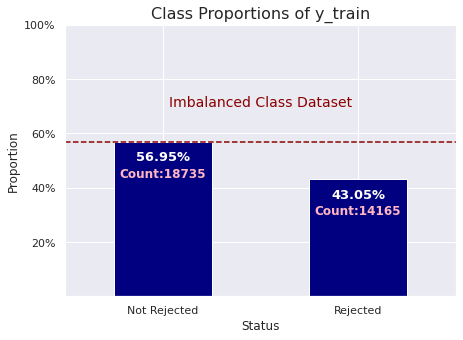

In [39]:
# bar chvalue_countsg matplotlib package
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in y_train series
plot_dataseries = round(y_train.value_counts(normalize = True)*100,2) 

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax, color = "navy")
plt.text(0.5,70,"Imbalanced Class Dataset",color = "darkred",
         horizontalalignment = "center",fontsize = 14)
plt.axhline(y = plot_dataseries[0],color = "darkred", linestyle = "--")
plt.title("Class Proportions of y_train", fontsize = 16)
plt.ylabel("Proportion", fontsize = 12)
plt.xlabel("Status", fontsize = 12)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["Not Rejected", "Rejected"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])

# create another series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")

# add/plot the data-label (in%) in the chart
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-7,data_label[x],color = "white",
             fontweight = 700,fontsize = 13, horizontalalignment = "center")

# add/plot the data-label (in count) in the chart
for x,y in enumerate(y_train.value_counts()):
    plt.text(x,plot_dataseries[x]- 13,f"Count:{y_train.value_counts()[x]}",
             horizontalalignment = "center", color = "lightpink",fontsize = 12, fontweight = 700)


plt.show()

<br>**6.b.ii.** Resample the training datasets to obtain balanced target class distribution.

*Click [here](#toc) to go back to **Table of Contents**.*

In [40]:
# resample it (training dataset) using Random Over Sampling
ros = RandomOverSampler(random_state = 42)
X_train_over,y_train_over = ros.fit_resample(X_train,y_train)

# print the shape of the training and testing datasets
print(f"Shape of X_train_over :{X_train_over.shape}",
      f"\nShape of y_train_over: {y_train_over.shape}")

Shape of X_train_over :(37470, 7) 
Shape of y_train_over: (37470,)


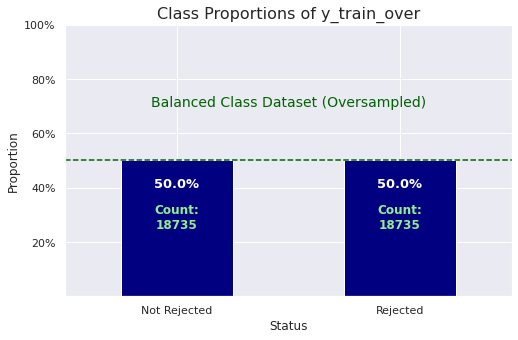

In [41]:
# plot bar chart using matplotlib package
fig,ax = plt.subplots(figsize = (8,5))

# calculate and store the proportion values in a y_train_over
plot_dataseries = round(y_train_over.value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax, color = "navy")
plt.text(0.5,70,"Balanced Class Dataset (Oversampled)",color = "darkgreen",
         horizontalalignment = "center",fontsize = 14)
plt.axhline(y = plot_dataseries[0],color = "darkgreen", linestyle = "--")
plt.title("Class Proportions of y_train_over", fontsize = 16)
plt.ylabel("Proportion", fontsize = 12)
plt.xlabel("Status", fontsize = 12)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["Not Rejected", "Rejected"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])

# create another series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")

# add/plot the data-label in the chart
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-10,data_label[x],color = "white",
             fontweight = 700,fontsize = 13, horizontalalignment = "center")

# add/plot the data-label (in count) in the chart
for x,y in enumerate(y_train_over.value_counts()):
    plt.text(x,plot_dataseries[x]- 25,f"Count:\n{y_train_over.value_counts()[x]}",
             horizontalalignment = "center", color = "lightgreen", fontweight = 700)

plt.show()

<a id = "data_transformation"></a>
**6.c. Data Transformation**.<br>
    &emsp;i. Create a pipeline for transforming the **numeric feature**.<br>
    &emsp;ii. Create a pipeline for transforming the **categorical features**.<br>
    &emsp;iii. Create a column transformer object to enclose **both the transformers** so they could execute **in parallel**.<br>
<br>**6.c.i.** Create a pipeline for transforming the numeric feature.

*Click [here](#toc) to go back to **Table of Contents**.*

In [42]:
# create a pipeline with steps as simpleimputer and minmaxscaler
num_transformer = make_pipeline(SimpleImputer(),MinMaxScaler())
num_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

<br>**6.c.ii.** Create a pipeline for transforming the categorical features.

*Click [here](#toc) to go back to **Table of Contents**.*

In [43]:
# create a pipeline with one step as onehotencoder
cat_transformer = make_pipeline(SimpleImputer(strategy = "most_frequent"),OneHotEncoder(drop = "first")) 
cat_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(drop='first'))])

<br>**6.c.iii.** iii. Create a column transformer object to transform both the numeric and categorical features in parallel.

*Click [here](#toc) to go back to **Table of Contents**.*

In [44]:
# create a columntransformer with num_transformer and 
# cat_transformer as its elements
col_transformer = ColumnTransformer(
    [
        ("numtransformer",num_transformer,
         X_train_over.select_dtypes(exclude = "object").columns),
        ("cattransformer",cat_transformer,X_train_over.select_dtypes(include = "object").columns)
    ]
)
col_transformer

ColumnTransformer(transformers=[('numtransformer',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['amount'], dtype='object')),
                                ('cattransformer',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['fulfilment', 'shipservicelevel', 'category', 'size', 'b2b', 'region'], dtype='object'))])

<a id = "models"></a>
#### **7. CLASSIFICATION MODELS FOR PREDICTION**
We shall make classification prediction using three models based on:
<br>&emsp;a. **Logistic Regression Classifier**
<br>&emsp;b. **Random Forest classifier**  
* The idea is to **evaluate performances** of **both the predictors** and also, look for  **similarities among them** with regard to **important features**

*Click [here](#toc) to go back to **Table of Contents**.*

<a id = "logisticregression"></a>
##### **7.a. Logistic Regression Classifier**
<a id = "logistic_model"></a>
**7.a.i.** Define an instance of logistic regression estimator using pipeline and fit the model.

*Click [here](#toc) to go back to **Table of Contents**.*

In [45]:
# define an instance for logistic regression estimator using pipeline 
logistic_model = make_pipeline(
    col_transformer,
    LogisticRegression(random_state = 42, max_iter = 1000)
)

# fit the model on resampled training datasets
logistic_model.fit(X_train_over,y_train_over)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numtransformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['amount'], dtype='object')),
                                                 ('cattransformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['fulfilment', 'shipservicelevel', 'category', 'size', 'b2b', 'region'], dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

<a id = "prediction_training_logistic"></a> <br>
<br>**7.a.ii. Prediction and Performance - TRAINING DATASET**
* Prediction with, and performance of, **Logistic Regression Classifier** of the **Training Dataset**

*Click [here](#toc) to go back to **Table of Contents**.*

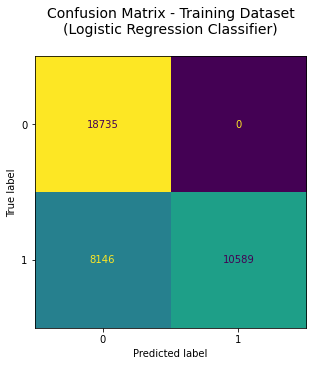

ACCURACY SCORE (Training) : 78.26%
PRECISION SCORE (Training):  100.0 %
RECALL SCORE (Training):  56.52 %


In [46]:
# predict the target from X_train_over features
y_train_over_pred_lr = logistic_model.predict(X_train_over)
confusion_train_lr = confusion_matrix(y_train_over,y_train_over_pred_lr)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_estimator(logistic_model,X_train_over,y_train_over,
                                      ax = ax, colorbar=False)
                        # (OR)
# ConfusionMatrixDisplay.from_predictions(y_train_over,y_train_over_pred_lr,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Training Dataset\n(Logistic Regression Classifier)\n",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_train_lr = round(logistic_model.score(X_train_over,y_train_over)*100,2)
print(f"ACCURACY SCORE (Training) : {accuracy_train_lr}%")

# Precision
precision_train_lr = round(confusion_train_lr[1,1]/(confusion_train_lr[1,1]+confusion_train_lr[0,1])*100,2)
print("PRECISION SCORE (Training): ",precision_train_lr,"%")

# Recall
recall_train_lr = round(confusion_train_lr[1,1]/(confusion_train_lr[1,1]+confusion_train_lr[1,0])*100,2)
print("RECALL SCORE (Training): ",recall_train_lr,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

<a id = "prediction_test_logistic"></a> <br>
<br>**7.a.iii. Prediction and Performance -  TEST DATASET**
* Prediction with, and performance of, **Logistic Regression Classifier** of the **Test Dataset**

*Click [here](#toc) to go back to **Table of Contents**.*

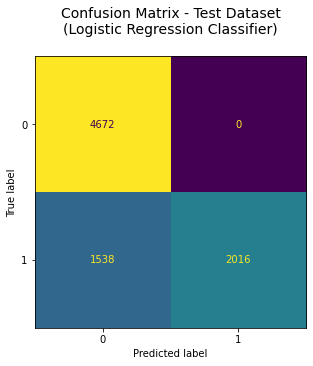

ACCURACY SCORE (Test) : 81.3%
PRECISION SCORE (Test):  100.0 %
RECALL SCORE (Test):  56.72 %


In [47]:
# predict the target from X_train_over features
y_test_pred_lr = logistic_model.predict(X_test)
confusion_test_lr = confusion_matrix(y_test,y_test_pred_lr)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_estimator(logistic_model,X_test,y_test,
                                      ax = ax, colorbar=False)
                        # (OR)
# ConfusionMatrixDisplay.from_predictions(y_train_over,y_train_over_pred,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Test Dataset\n(Logistic Regression Classifier)\n",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_test_lr = round(logistic_model.score(X_test,y_test)*100,2)
print(f"ACCURACY SCORE (Test) : {accuracy_test_lr}%")

# Precision
precision_test_lr = round(confusion_test_lr[1,1]/(confusion_test_lr[1,1]+confusion_test_lr[0,1])*100,2)
print("PRECISION SCORE (Test): ",precision_test_lr,"%")

# Recall
recall_test_lr = round(confusion_test_lr[1,1]/(confusion_test_lr[1,1]+confusion_test_lr[1,0])*100,2)
print("RECALL SCORE (Test): ",recall_test_lr,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

<a id = "roc_logistic"></a>
<br>**7.a.iv. ROC Curve of Prediction with Logistic Regression - TEST DATASET**
* **TEST DATASET** - Receiver Operating Characteristic (**ROC**) **Curve** of the prediction of **Logistic Regression Classifier**

*Click [here](#toc) to go back to **Table of Contents**.*

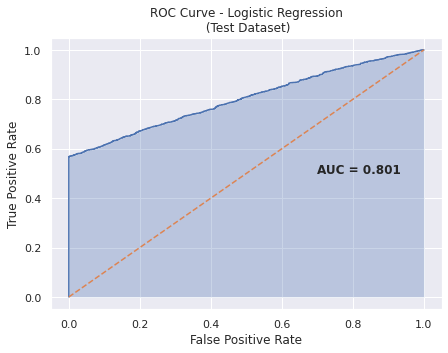

In [48]:
# Calculete the falsepositiverate(fpr), truepositiverate(tpr) for
# various thresholds
fpr_lr,tpr_lr,thresh_lr = roc_curve(y_test,
                           logistic_model.predict_proba(X_test)[:,1],
                           pos_label = 1)
# calculate the auc score
auc_lr = roc_auc_score(y_test,logistic_model.predict_proba(X_test)[:,1])

# plot the curve
fig, ax = plt.subplots(figsize = (7,5))
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1], linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression\n (Test Dataset)")
plt.fill_between(fpr_lr,tpr_lr, alpha = 0.3)
plt.text(0.7,0.5,f"AUC = {round(auc_lr,3)}",fontweight = 700)
plt.show()

<a id = "feat_imp_logistic"></a>
<br>**7.a.v. Feature Importance**
* Top 10 **features** impacting the **decision** on order-rejection based on **logistic regression classifier**.

*Click [here](#toc) to go back to **Table of Contents**.*

In [49]:
# create pandas series of weights(coefficients) as feature importance
# and feature names as index

# coefficients/weights list
weights_list = logistic_model.named_steps["logisticregression"].coef_.reshape(-1,)

# features list
features_list_lr = list(logistic_model["columntransformer"].transformers_[1][1]["onehotencoder"]
                 .get_feature_names_out())
features_list_lr.insert(0,"amount")

#create the pandas series
feature_importances_lr = pd.Series(weights_list,index = features_list_lr)

# sort values based on weights 
feature_importances_lr = feature_importances_lr.sort_values(key = abs)

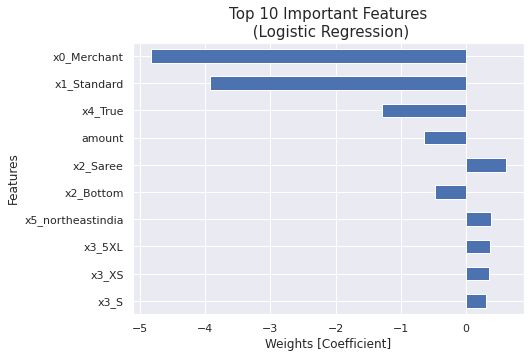

In [50]:
# plot top 10 select_dtypesbottom 10 important features
fig, ax = plt.subplots(figsize = (7,5))
#plt.subplots_adjust(hspace = 0.5)
plt.title("Top 10 Important Features\n (Logistic Regression)", fontsize= 15)
feature_importances_lr.tail(10).plot(kind = "barh", ax = ax)
plt.xlabel("Weights [Coefficient]",fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

<a id = "random_forest"></a>
##### **7.b. Random Forest Classifier**
<a id = "rf_estimator"></a>
**7.b.i. Instance; Hyperparameter Tuning; Model Fitting** 
* Define an instance of **random forest estimator** using **pipeline**,
* Set the **parameters range** for **hyperparameter tunning** to identify the best parameters for estimation, and 
* Create an instance of **GridSearchCV()** (model) and **fit the classification model** to find the best estimator.

*Click [here](#toc) to go back to **Table of Contents**.*

In [51]:
# define an instance of random forest estimator using pipeline
rf_estimator = make_pipeline(
    col_transformer,RandomForestClassifier(random_state = 42)
)

# Set the parameters ranges for hyperparameter tunning
params_rf = {
    "randomforestclassifier__max_depth":range(10,31,2), #  chosen this range to avoid overfitting
    "randomforestclassifier__n_estimators": range(10,101,10)
}

# create an instance of GridSearchCV (model) and then fit the model.
clf_rf = GridSearchCV(rf_estimator,cv = 6,param_grid = params_rf,n_jobs = -1, verbose = 1)
clf_rf.fit(X_train_over,y_train_over)

Fitting 6 folds for each of 110 candidates, totalling 660 fits


GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numtransformer',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['amount'], dtype='object')),
                                                                        ('cattransformer',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         Index(['fulfilment', 'shipservicelevel', 'category', 'size', 'b2b', 'region'], dtype='object'))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 31, 2),
                         'randomforestclassifier__n_estimators': range(10, 101, 10)},
             verbose=1)

In [52]:
# Best parameter for best estimator
# read the best_params_ values into dataframe
best_parameter_rf = pd.DataFrame.from_dict(clf_rf.best_params_,orient = "index")    

# rename the index
best_parameter_rf.index = [element[1] for element in best_parameter_rf.index.str.rsplit("__",1,expand = True)]

# rename the column
best_parameter_rf.rename(columns = {0:"best_parameter_value"}, inplace=True)

# display the best_parameter dataframe
best_parameter_rf

,best_parameter_value
max_depth,30
n_estimators,80


<a id = "prediction_training_rf"></a> <br>
<br>**7.b.ii. Prediction and Performance - TRAINING DATASET**
* Prediction with, and performance of, **Random Forest Classifier** of the **Training Dataset**

*Click [here](#toc) to go back to **Table of Contents**.*

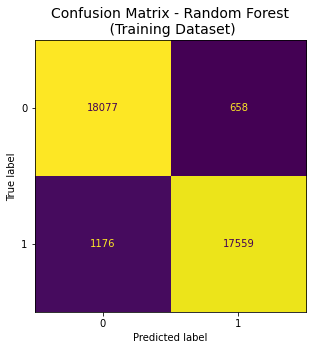

ACCURACY SCORE (Training): 87.28%
PRECISION SCORE (Training):  96.39 %
RECALL SCORE (Training):  93.72 %


In [53]:
# predict the target from X_train_over features
y_train_over_pred_rf = clf_rf.predict(X_train_over)
confusion_train_rf = confusion_matrix(y_train_over,y_train_over_pred_rf)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (7,5))
ConfusionMatrixDisplay.from_estimator(clf_rf,X_train_over,y_train_over,
                                      ax = ax, colorbar=False)
                        # (OR)
# ConfusionMatrixDisplay.from_predictions(y_train_over,y_train_over_pred,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Random Forest\n (Training Dataset)",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_train_rf = round(clf_rf.best_score_*100,2)
print(f"ACCURACY SCORE (Training): {accuracy_train_rf}%")

# Precision
precision_train_rf = round(confusion_train_rf[1,1]/(confusion_train_rf[1,1]+confusion_train_rf[0,1])*100,2)
print("PRECISION SCORE (Training): ",precision_train_rf,"%")

# Recall
recall_train_rf = round(confusion_train_rf[1,1]/(confusion_train_rf[1,1]+confusion_train_rf[1,0])*100,2)
print("RECALL SCORE (Training): ",recall_train_rf,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

<a id = "prediction_test_rf"></a> <br>
<br>**7.b.iii. Prediction and Performance -  TEST DATASET**
* Prediction with, and performance of, **Random Forest Classifier** of the **Test Dataset**

*Click [here](#toc) to go back to **Table of Contents**.*

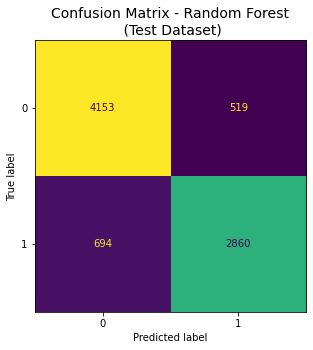

ACCURACY SCORE (Test): 85.25%
PRECISION SCORE (Test):  84.64 %
RECALL (Test):  80.47 %


In [54]:
# predict the target from X_train_over features
y_test_pred_rf = clf_rf.predict(X_test)
confusion_test_rf = confusion_matrix(y_test,y_test_pred_rf)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_estimator(clf_rf,X_test,y_test,
                                      ax = ax, colorbar=False)
                        # (OR)
#ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_rf,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Random Forest\n (Test Dataset)",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_test_rf = round(clf_rf.score(X_test,y_test)*100,2)
print(f"ACCURACY SCORE (Test): {accuracy_test_rf}%")

# Precision
precision_test_rf =  round(confusion_test_rf[1,1]/(confusion_test_rf[1,1]+confusion_test_rf[0,1])*100,2)
print("PRECISION SCORE (Test): ",precision_test_rf,"%")

# Recall
recall_test_rf = round(confusion_test_rf[1,1]/(confusion_test_rf[1,1]+confusion_test_rf[1,0])*100,2)
print("RECALL (Test): ",recall_test_rf,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

<a id = "roc_rf"></a>
<br>**7.a.iv. ROC Curve of Prediction with Logistic Regression - TEST DATASET**
* **TEST DATASET** - Receiver Operating Characteristic (**ROC**) **Curve** of the prediction of **Random Forest Classifier**

*Click [here](#toc) to go back to **Table of Contents**.*

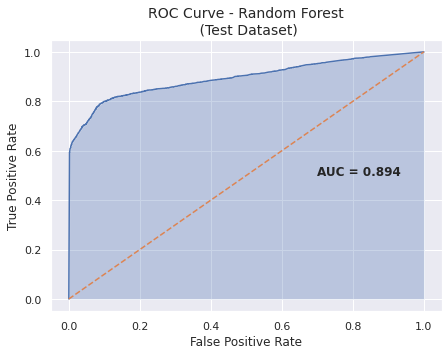

In [55]:
# Calculete the falsepositiverate(fpr), truepositiverate(tpr) for
# various thresholds
fpr_rf,tpr_rf,thresh_rf = roc_curve(y_test,
                           clf_rf.predict_proba(X_test)[:,1],
                           pos_label = 1)
# calculate the auc score
auc_rf = roc_auc_score(y_test,clf_rf.predict_proba(X_test)[:,1])

# plot the curve
fig,ax = plt.subplots(figsize = (7,5))
plt.plot(fpr_rf,tpr_rf)
plt.plot([0,1],[0,1], linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest\n (Test Dataset)",fontsize = 14)
plt.fill_between(fpr_rf,tpr_rf, alpha = 0.3)
plt.text(0.7,0.5,f"AUC = {round(auc_rf,3)}", fontweight = 700)
plt.show()

<a id = "feat_imp_rf"></a>
<br>**7.b.v. Feature Importance**
* Top 10 **features** impacting the **decision** on order-rejection based on **random forest classifier**.

*Click [here](#toc) to go back to **Table of Contents**.*

In [56]:
# create pandas series of feature importance
# and feature names as index

# Degree of feature importance list
feature_importances_rf = (
    clf_rf.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
)

# feature names to be assigned as index
feature_list_rf = list(
    (
        clf_rf.best_estimator_.named_steps["columntransformer"]
        .transformers_[1][1].named_steps["onehotencoder"].get_feature_names_out()
    )
)
feature_list_rf.insert(0,"amount")

# create feature importance pandas series
feature_importances_rf = pd.Series(feature_importances_rf,index = feature_list_rf)

# sort values
feature_importances_rf = feature_importances_rf.sort_values(key = abs)

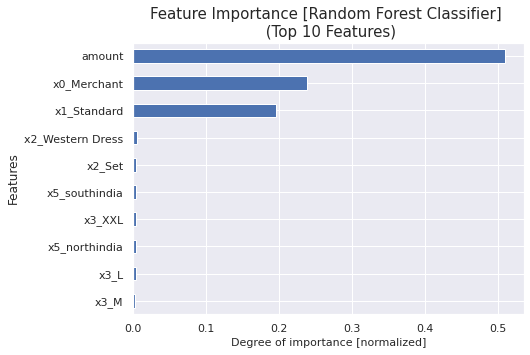

In [57]:
# plot top 10 important features
fig, ax = plt.subplots(figsize = (7,5))
plt.title("Feature Importance [Random Forest Classifier] \n (Top 10 Features)", fontsize= 15)
feature_importances_rf.tail(10).plot(kind = "barh", ax = ax)
plt.xlabel("Degree of importance [normalized]",fontsize = 11)
plt.ylabel("Features", fontsize = 12)
plt.show()

<a id = "findings_discussion"></a>
#### **8. FINDINGS AND DISCUSSION**
<a id = "findings"></a>
**8.a. Findings**

*Click [here](#toc) to go back to **Table of Contents**.*

In [58]:
# tabular presentation of performances usind pandas dataframe

data_values = {
    "Model (Classifier)":["Logistic Regression","Random Forest"],
    "Accuracy":[accuracy_test_lr,accuracy_test_rf],
    "Precision":[precision_test_lr,precision_test_rf],
    "Recall":[recall_test_lr,recall_test_rf],
    "AUC":[auc_lr,auc_rf]
}
performance_table = pd.DataFrame(data_values)
performance_table

,Model (Classifier),Accuracy,Precision,Recall,AUC
0,Logistic Regression,81.30,100.00,56.72,0.801337
1,Random Forest,85.25,84.64,80.47,0.893748


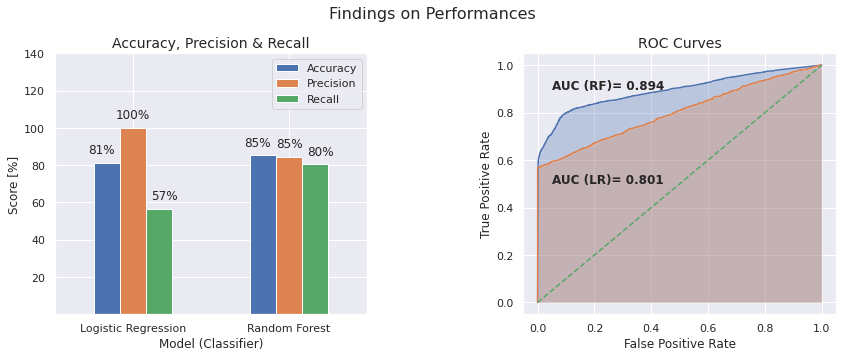

In [59]:
# visualization of the consolidated performances
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,5))
plt.suptitle("Findings on Performances\n", fontsize = 16)
plt.subplots_adjust(wspace = 0.5, top = 0.85)

# plot for column chart
performance_table.plot(kind = "bar",x = "Model (Classifier)",
                       y = ["Accuracy","Precision","Recall"], ax = ax1)
ax1.set_title("Accuracy, Precision & Recall", fontsize = 14)
ax1.set_ylabel("Score [%]")
ax1.set_xticks(ticks = [0,1], labels = performance_table.iloc[:,0],rotation = 0 )
ax1.set_yticks(ticks = range(20,141,20))
ax1.legend(loc = "upper right")

#data labels of "logistic regression"
x = -0.2
for y in performance_table.iloc[0,1:4]:
    ax1.text(x,y+5,str(round(y))+"%",horizontalalignment = "center")
    x = x + 0.2
    
# data labels of "random forest"
x = 0.8
for y in performance_table.iloc[1,1:4]:
    ax1.text(x,y+5,str(round(y))+"%",horizontalalignment = "center")
    x = x + 0.2


# plot the ROC curves of both the models
ax2.plot(fpr_rf,tpr_rf)
ax2.plot(fpr_lr,tpr_lr)
ax2.plot([0,1],[0,1], linestyle = "--")
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Curves",fontsize = 14)
ax2.fill_between(fpr_rf,tpr_rf, alpha = 0.3)
ax2.fill_between(fpr_lr,tpr_lr, alpha = 0.3)
ax2.text(0.05,0.9,f"AUC (RF)= {round(auc_rf,3)}", fontweight = 700)
ax2.text(0.05,0.5,f"AUC (LR)= {round(auc_lr,3)}", fontweight = 700)
plt.show()

<a id = "discussion"></a>
**8.b. Discussion**<br>
* It's clear from the figures above that **random forest classifier performs better** than logistic regression classifier.
* Also, we may conclude that the **important features impacting** the **decision** of the customer in **rejecting the orders or not** are **"amount"**,**"merchant"** and **"standard"** as they are found having **greater magnitude** and in **top five** features, common, in both the models.
* The findings may be of valuable insights to business owners, sellers and other stakeholders, and the are recommended to focus on these important features.
* Some of the limitations of this analysis aree exclusion of orders with multiple-product purchase,ununconfirmed status and some features.
* Further analyses are recommended to other fellow data analyst/scientists  by using other classification machine learning models and other feature selection criteria.

*Click [here](#toc) to go back to **Table of Contents**.*

## <center>Valuable inputs and suggestions will be very much appreciated.</center>
## <center>THANK YOU for spending you valuable time in reading this project. </center>
## <center> Please do share this work with friends if it's worth sharing. </center>
